In [1]:
import numpy as np
import pandas as pd

In [2]:
#getting the feature names from fetaure text file
features=list()
with open('UCI_HAR_Dataset/features.txt') as f:
    features=[line.split()[1] for line in f.readlines()]
print("No of Features {}".format(len(features)))

    

No of Features 561


In [3]:
#getting training data
X_train = pd.read_csv('UCI_HAR_dataset/train/X_train.txt', delim_whitespace=True,header=None)
X_train.columns=features

X_train['subject']=pd.read_csv('UCI_HAR_dataset/train/subject_train.txt',header=None,squeeze=True)

Y_train=pd.read_csv('UCI_HAR_dataset/train/y_train.txt',names=["Activity"],header=None,squeeze=True)

Y_train_labels=Y_train.map({1: 'WALKING', 2:'WALKING_UPSTAIRS',3:'WALKING_DOWNSTAIRS',4:'SITTING', 5:'STANDING',6:'LAYING'})

In [4]:
#putting all train data together
train=X_train
train["Activity"]=Y_train
train["ActivityName"]=Y_train_labels

In [5]:
train.shape

(7352, 564)

In [6]:
#getting test data
X_test = pd.read_csv('UCI_HAR_dataset/test/X_test.txt', delim_whitespace=True,header=None)
X_test.columns=features

X_test['subject']=pd.read_csv('UCI_HAR_dataset/test/subject_test.txt',header=None,squeeze=True)

Y_test=pd.read_csv('UCI_HAR_dataset/test/y_test.txt',names=["Activity"],header=None,squeeze=True)

Y_test_labels=Y_train.map({1: 'WALKING', 2:'WALKING_UPSTAIRS',3:'WALKING_DOWNSTAIRS',4:'SITTING', 5:'STANDING',6:'LAYING'})

In [7]:
#putting all test data together
test=X_test
test["Activity"]=Y_test
test["ActivityName"]=Y_test_labels

In [9]:
test.shape

(2947, 564)

# Data cleaning

## 1.Check for Duplicates

In [8]:
print("duplicate values in train {}".format(sum(train.duplicated())))
print("duplicate values in test {}".format(sum(test.duplicated())))

duplicate values in train 0
duplicate values in test 0


## 2.Check for NAN values

In [9]:
print("Null values in train {}".format(train.isnull().values.sum()))
print("Null values in test {}".format(train.isnull().values.sum()))

Null values in train 0
Null values in test 0


In [10]:
##3.Check for imbalanced datasets
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

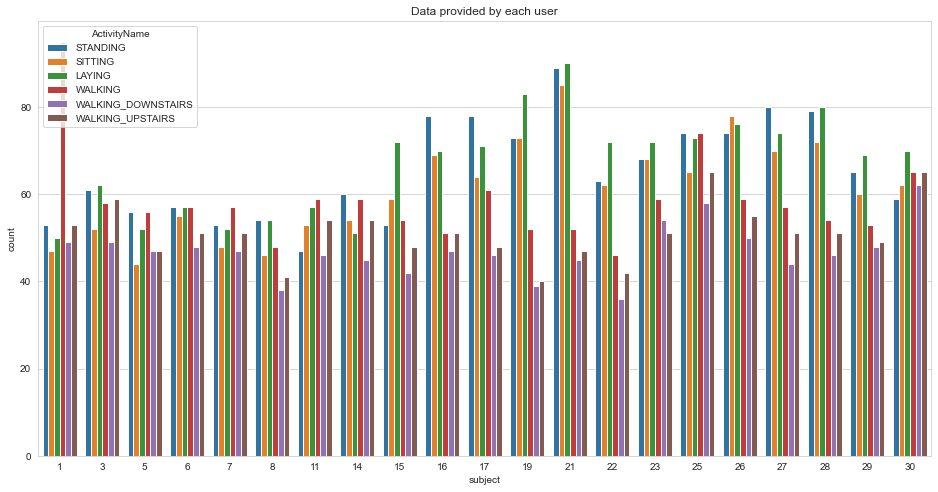

In [11]:
plt.figure(figsize=(16,8))
plt.title("Data provided by each user")
sns.countplot(x="subject",hue="ActivityName",data=train)
plt.show()

>we got almost same number of reading from all subject(Person)

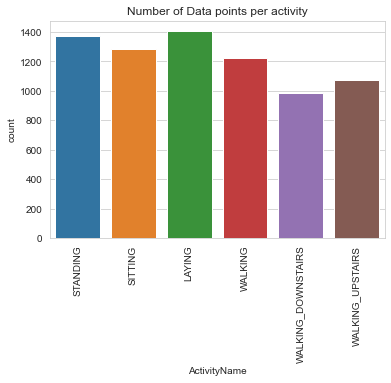

In [12]:
plt.title("Number of Data points per activity")
plt.xticks(rotation=90)
sns.countplot(x=train.ActivityName,data=train)
plt.show()

### Observation
>our data is balanced(almost)

## 4.Changing feature Names

In [13]:
columns=train.columns

columns=columns.str.replace("[()]",'')
columns=columns.str.replace("[-]",'')
columns=columns.str.replace("[,]",'')

train.columns=columns
test.columns=columns

test

,tBodyAccmeanX,tBodyAccmeanY,tBodyAccmeanZ,tBodyAccstdX,tBodyAccstdY,tBodyAccstdZ,tBodyAccmadX,tBodyAccmadY,tBodyAccmadZ,tBodyAccmaxX,...,angletBodyAccMeangravity,angletBodyAccJerkMeangravityMean,angletBodyGyroMeangravityMean,angletBodyGyroJerkMeangravityMean,angleXgravityMean,angleYgravityMean,angleZgravityMean,subject,Activity,ActivityName
0,0.257178,-0.023285,-0.014654,-0.938404,-0.920091,-0.667683,-0.952501,-0.925249,-0.674302,-0.894088,...,0.006462,0.162920,-0.825886,0.271151,-0.720009,0.276801,-0.057978,2,5,STANDING
1,0.286027,-0.013163,-0.119083,-0.975415,-0.967458,-0.944958,-0.986799,-0.968401,-0.945823,-0.894088,...,-0.083495,0.017500,-0.434375,0.920593,-0.698091,0.281343,-0.083898,2,5,STANDING
2,0.275485,-0.026050,-0.118152,-0.993819,-0.969926,-0.962748,-0.994403,-0.970735,-0.963483,-0.939260,...,-0.034956,0.202302,0.064103,0.145068,-0.702771,0.280083,-0.079346,2,5,STANDING
3,0.270298,-0.032614,-0.117520,-0.994743,-0.973268,-0.967091,-0.995274,-0.974471,-0.968897,-0.938610,...,-0.017067,0.154438,0.340134,0.296407,-0.698954,0.284114,-0.077108,2,5,STANDING
4,0.274833,-0.027848,-0.129527,-0.993852,-0.967445,-0.978295,-0.994111,-0.965953,-0.977346,-0.938610,...,-0.002223,-0.040046,0.736715,-0.118545,-0.692245,0.290722,-0.073857,2,5,STANDING
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2942,0.310155,-0.053391,-0.099109,-0.287866,-0.140589,-0.215088,-0.356083,-0.148775,-0.232057,0.185361,...,-0.337422,0.346295,0.884904,-0.698885,-0.651732,0.274627,0.184784,24,2,LAYING
2943,0.363385,-0.039214,-0.105915,-0.305388,0.028148,-0.196373,-0.373540,-0.030036,-0.270237,0.185361,...,-0.736701,-0.372889,-0.657421,0.322549,-0.655181,0.273578,0.182412,24,2,LAYING
2944,0.349966,0.030077,-0.115788,-0.329638,-0.042143,-0.250181,-0.388017,-0.133257,-0.347029,0.007471,...,-0.181560,0.088574,0.696663,0.363139,-0.655357,0.274479,0.181184,24,2,LAYING
2945,0.237594,0.018467,-0.096499,-0.323114,-0.229775,-0.207574,-0.392380,-0.279610,-0.289477,0.007471,...,0.444558,-0.819188,0.929294,-0.008398,-0.659719,0.264782,0.187563,24,2,LAYING


## 5.Saving the Data to CSV files


In [17]:
train.to_csv("UCI_HAR_Dataset/csv_files/train.csv",index=False)
test.to_csv('UCI_HAR_Dataset/csv_files/test.csv', index=False)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


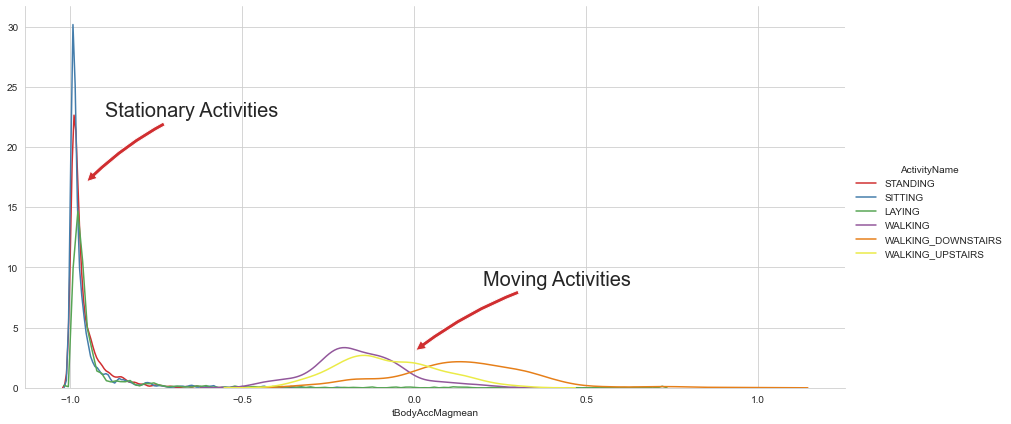

In [14]:
sns.set_palette("Set1", desat=0.80)
facetgrid = sns.FacetGrid(train, hue='ActivityName', size=6,aspect=2)
facetgrid.map(sns.distplot,'tBodyAccMagmean', hist=False)\
    .add_legend()
plt.annotate("Stationary Activities", xy=(-0.956,17), xytext=(-0.9, 23), size=20,\
            va='center', ha='left',\
            arrowprops=dict(arrowstyle="simple",connectionstyle="arc3,rad=0.1"))

plt.annotate("Moving Activities", xy=(0,3), xytext=(0.2, 9), size=20,\
            va='center', ha='left',\
            arrowprops=dict(arrowstyle="simple",connectionstyle="arc3,rad=0.1"))
plt.show()

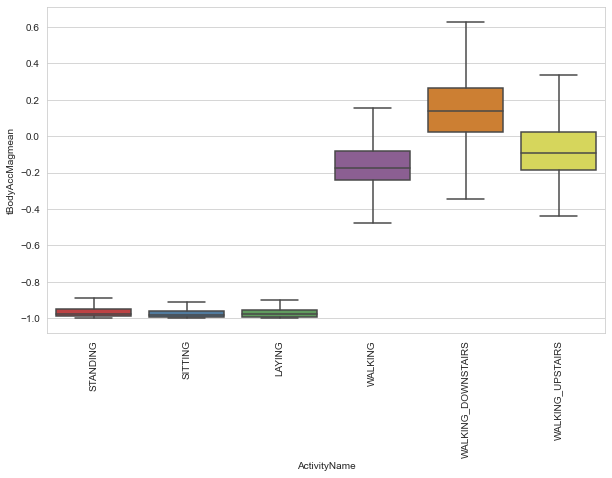

In [15]:
plt.figure(figsize=(10,6))
plt.xticks(rotation=90)
sns.boxplot(x="ActivityName",y="tBodyAccMagmean",data=train,showfliers=False)


__ Observations__:
-If tAccMean <-0.8 then activites are either standing,sitting and laying
-If tAccMean is > -0.6 then activities are either walking,sitting and laying

### 4. Position of GravityAccelerationComponants also matters 

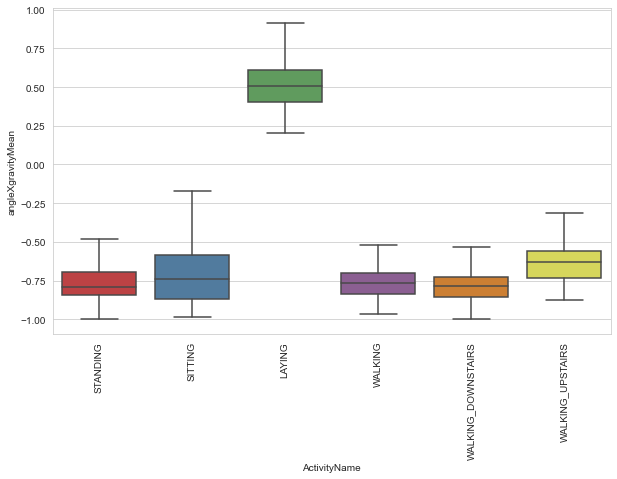

In [20]:
plt.figure(figsize=(10,6))
plt.xticks(rotation=90)
sns.boxplot(x="ActivityName",y="angleXgravityMean",data=train,showfliers=False)

__ Observations__:
* If angleXgravityMean > 0 then Activity is Laying

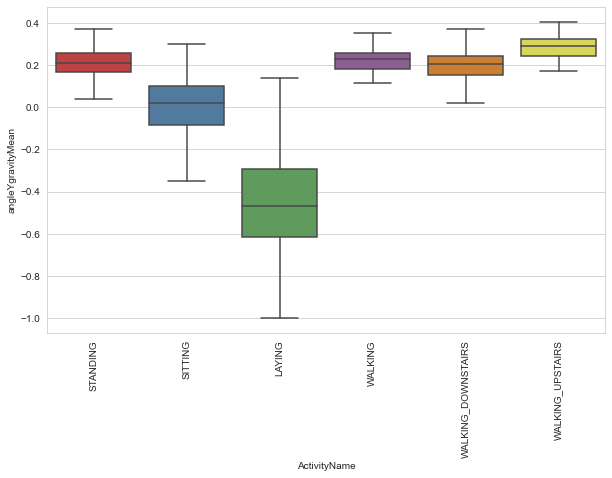

In [22]:
plt.figure(figsize=(10,6))
plt.xticks(rotation=90)
sns.boxplot(x="ActivityName",y="angleYgravityMean",data=train,showfliers=False)

In [16]:
#Perform tsne on the Dataset
from sklearn.manifold import TSNE

In [17]:
#Perform TSNE with different perspective value and thier plots
def perform_tsne(x_data,y_data,perplexities,n_iter=1000,image_name_prefix="T-SNE"):
    for index,perplexity in enumerate(perplexities):
        print("performing tsne with perplexity {} and iteration {}".format(perplexity,n_iter))
        X_reduced=TSNE(verbose=2,perplexity=perplexity).fit_transform(x_data)
        print("Done")
        
        print("creating plot for visualization")
        df=pd.DataFrame({"x":X_reduced[:,0],"y":X_reduced[:,1],'label':y_data})
        sns.lmplot(x="x",y="y",data=df,hue="label",markers=['^','v','s','o', '1','2'])
        plt.show()


performing tsne with perplexity 2 and iteration 1000
[t-SNE] Computing 7 nearest neighbors...
[t-SNE] Indexed 7352 samples in 0.008s...
[t-SNE] Computed neighbors for 7352 samples in 1.272s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7352
[t-SNE] Computed conditional probabilities for sample 2000 / 7352
[t-SNE] Computed conditional probabilities for sample 3000 / 7352
[t-SNE] Computed conditional probabilities for sample 4000 / 7352
[t-SNE] Computed conditional probabilities for sample 5000 / 7352
[t-SNE] Computed conditional probabilities for sample 6000 / 7352
[t-SNE] Computed conditional probabilities for sample 7000 / 7352
[t-SNE] Computed conditional probabilities for sample 7352 / 7352
[t-SNE] Mean sigma: 0.635854
[t-SNE] Computed conditional probabilities in 0.028s
[t-SNE] Iteration 50: error = 124.7413406, gradient norm = 0.0260446 (50 iterations in 2.523s)
[t-SNE] Iteration 100: error = 106.7608185, gradient norm = 0.0302844 (50 iterations in 1.446s)
[t-SNE

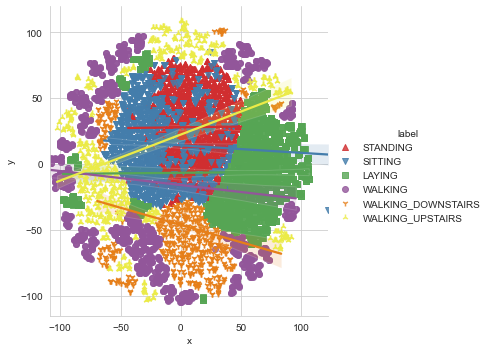

performing tsne with perplexity 5 and iteration 1000
[t-SNE] Computing 16 nearest neighbors...
[t-SNE] Indexed 7352 samples in 0.012s...
[t-SNE] Computed neighbors for 7352 samples in 1.359s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7352
[t-SNE] Computed conditional probabilities for sample 2000 / 7352
[t-SNE] Computed conditional probabilities for sample 3000 / 7352
[t-SNE] Computed conditional probabilities for sample 4000 / 7352
[t-SNE] Computed conditional probabilities for sample 5000 / 7352
[t-SNE] Computed conditional probabilities for sample 6000 / 7352
[t-SNE] Computed conditional probabilities for sample 7000 / 7352
[t-SNE] Computed conditional probabilities for sample 7352 / 7352
[t-SNE] Mean sigma: 0.961265
[t-SNE] Computed conditional probabilities in 0.045s
[t-SNE] Iteration 50: error = 114.0795364, gradient norm = 0.0216000 (50 iterations in 1.991s)
[t-SNE] Iteration 100: error = 97.6579971, gradient norm = 0.0158075 (50 iterations in 1.570s)
[t-SNE

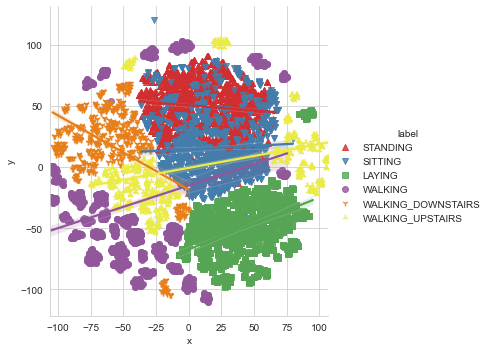

performing tsne with perplexity 10 and iteration 1000
[t-SNE] Computing 31 nearest neighbors...
[t-SNE] Indexed 7352 samples in 0.012s...
[t-SNE] Computed neighbors for 7352 samples in 1.357s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7352
[t-SNE] Computed conditional probabilities for sample 2000 / 7352
[t-SNE] Computed conditional probabilities for sample 3000 / 7352
[t-SNE] Computed conditional probabilities for sample 4000 / 7352
[t-SNE] Computed conditional probabilities for sample 5000 / 7352
[t-SNE] Computed conditional probabilities for sample 6000 / 7352
[t-SNE] Computed conditional probabilities for sample 7000 / 7352
[t-SNE] Computed conditional probabilities for sample 7352 / 7352
[t-SNE] Mean sigma: 1.133828
[t-SNE] Computed conditional probabilities in 0.070s
[t-SNE] Iteration 50: error = 105.0311508, gradient norm = 0.0272131 (50 iterations in 1.789s)
[t-SNE] Iteration 100: error = 90.2161255, gradient norm = 0.0100028 (50 iterations in 1.585s)
[t-SN

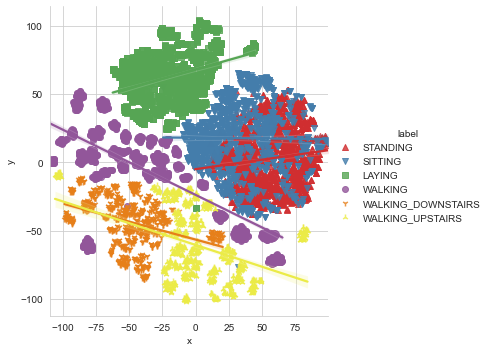

performing tsne with perplexity 20 and iteration 1000
[t-SNE] Computing 61 nearest neighbors...
[t-SNE] Indexed 7352 samples in 0.007s...
[t-SNE] Computed neighbors for 7352 samples in 1.416s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7352
[t-SNE] Computed conditional probabilities for sample 2000 / 7352
[t-SNE] Computed conditional probabilities for sample 3000 / 7352
[t-SNE] Computed conditional probabilities for sample 4000 / 7352
[t-SNE] Computed conditional probabilities for sample 5000 / 7352
[t-SNE] Computed conditional probabilities for sample 6000 / 7352
[t-SNE] Computed conditional probabilities for sample 7000 / 7352
[t-SNE] Computed conditional probabilities for sample 7352 / 7352
[t-SNE] Mean sigma: 1.274335
[t-SNE] Computed conditional probabilities in 0.158s
[t-SNE] Iteration 50: error = 97.6589966, gradient norm = 0.0183873 (50 iterations in 2.067s)
[t-SNE] Iteration 100: error = 83.7346802, gradient norm = 0.0061066 (50 iterations in 1.779s)
[t-SNE

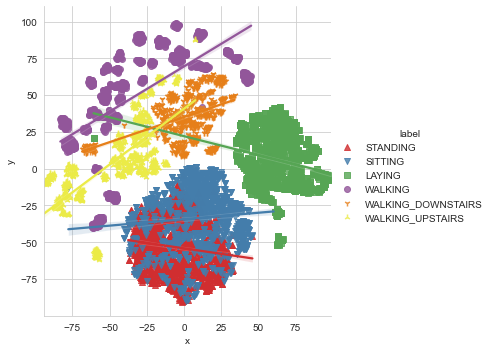

performing tsne with perplexity 50 and iteration 1000
[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 7352 samples in 0.010s...
[t-SNE] Computed neighbors for 7352 samples in 1.644s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7352
[t-SNE] Computed conditional probabilities for sample 2000 / 7352
[t-SNE] Computed conditional probabilities for sample 3000 / 7352
[t-SNE] Computed conditional probabilities for sample 4000 / 7352
[t-SNE] Computed conditional probabilities for sample 5000 / 7352
[t-SNE] Computed conditional probabilities for sample 6000 / 7352
[t-SNE] Computed conditional probabilities for sample 7000 / 7352
[t-SNE] Computed conditional probabilities for sample 7352 / 7352
[t-SNE] Mean sigma: 1.437672
[t-SNE] Computed conditional probabilities in 0.442s
[t-SNE] Iteration 50: error = 86.0207520, gradient norm = 0.0256019 (50 iterations in 2.864s)
[t-SNE] Iteration 100: error = 75.6753922, gradient norm = 0.0042728 (50 iterations in 2.556s)
[t-SN

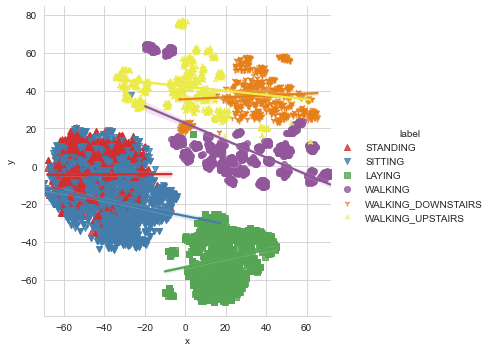

In [18]:
X_pre_tsne = train.drop(['subject', 'Activity','ActivityName'], axis=1)
y_pre_tsne = train['ActivityName']
perform_tsne(x_data = X_pre_tsne,y_data=y_pre_tsne, perplexities =[2,5,10,20,50])

In [29]:
labels=['LAYING', 'SITTING','STANDING','WALKING','WALKING_DOWNSTAIRS','WALKING_UPSTAIRS']

In [57]:
train_csv = pd.read_csv('UCI_HAR_dataset/csv_files/train.csv')
test_csv = pd.read_csv('UCI_HAR_dataset/csv_files/test.csv')
print(train.shape, test.shape)

(7352, 564) (2947, 564)


In [58]:
#preparing training data
X_train_data=train_csv.drop(['subject', 'Activity', 'ActivityName'],axis=1)
Y_train_data=train_csv["ActivityName"]

In [59]:
#preparing test data
X_test_data=test_csv.drop(['subject', 'Activity', 'ActivityName'],axis=1)
Y_test_data=test_csv["ActivityName"]

In [60]:
print('X_train and y_train : {},{}'.format(X_train_data.shape, Y_train_data.shape))
print('X_test  and y_test  : {},{}'.format(X_test_data.shape, Y_test_data.shape))

X_train and y_train : (7352, 561),(7352,)
X_test  and y_test  : (2947, 561),(2947,)


## 5. lets build our model data

In [61]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
plt.rcParams["font.family"] = 'DejaVu Sans'

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

### 6. Method to print the gridsearch Attributes

In [62]:
### Generic function to run any model specified
from datetime import datetime
from sklearn import metrics
def perform_model(model,x_train,y_train,x_test,y_test,class_labels,cm_cmap=plt.cm.Greens):
    results=dict()
    
    # time of model training
    train_start_time=datetime.now()
    print("training the model")
    model.fit(x_train,y_train)
    print("Done")
    train_end_time=datetime.now()
    results["training_time"]=train_end_time - train_start_time
    print("training time(HH:MM:SS)- {}\n".format(results["training_time"]))
    
    #predict test data
    print('Predicting test data')
    test_start_time=datetime.now()
    y_pred=model.predict(x_test)
    test_end_time = datetime.now()
    print('Done \n \n')
    results['testing_time'] = test_end_time - test_start_time
    print('testing time(HH:MM:SS:ms) - {}\n'.format(results['testing_time']))
    results['predicted'] = y_pred
    
    # calculate overall accuracty of the model
    accuracy=metrics.accuracy_score(y_true=y_test,y_pred=y_pred)
    results["accuracy"]=accuracy
    print("-------------------")
    print("| Accuracy |")
    print("{}".format(accuracy))
    
    
    #confusion matrix
    cmf=metrics.confusion_matrix(y_test,y_pred)
    results["confusion_matrix"]=cmf
    print("-------------------")
    print("| Confusion Matrix |")
    print("{}".format(cmf))
    
    #plot confusion matrix
    plt.figure(figsize=(8,8))
    plot_confusion_matrix(cmf,classes=class_labels,normalize=True,title="Normalized confusion matrix")
    plt.show()
    
    #Classification Report
    classification_report = metrics.classification_report(y_test, y_pred)
    results["classification_report"]=classification_report
    print("-------------------")
    print("| classification_report |")
    print("{}".format(classification_report))
    
    # add the trained  model to the results
    results['model'] = model
    
    return results


In [78]:
def print_grid_search_attributes(model):
    
    # get best estimator which have highest score
    print('--------------------------')
    print('|      Best Estimator     |')
    print('--------------------------')
    print('\n\t{}\n'.format(model.best_estimator_))
    
    # best paams which gave good results
    print('--------------------------')
    print('|     Best parameters     |')
    print('--------------------------')
    print('\tParameters of best estimator : \n\n\t{}\n'.format(model.best_params_))
    
    
     #  number of cross validation splits
    print('---------------------------------')
    print('|   No of CrossValidation sets   |')
    print('--------------------------------')
    print('\n\tTotal numbre of cross validation sets: {}\n'.format(model.n_splits_))
    
    # Average cross validated score of estimator from gridsearch
    print('--------------------------')
    print('|        Best Score       |')
    print('--------------------------')
    print('\n\tAverage Cross Validate scores of best estimator : \n\n\t{}\n'.format(model.best_score_))
    
    
    

# 7. Logistic Regression with Grid Search

In [79]:
from sklearn import linear_model
from sklearn.model_selection import GridSearchCV

training the model
Fitting 3 folds for each of 12 candidates, totalling 36 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  21 out of  36 | elapsed:    3.8s remaining:    2.7s
[Parallel(n_jobs=-1)]: Done  36 out of  36 | elapsed:    8.4s finished
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Done
training time(HH:MM:SS)- 0:00:10.614647

Predicting test data
Done 
 

testing time(HH:MM:SS:ms) - 0:00:00.008391

-------------------
| Accuracy |
0.9582626399728538
-------------------
| Confusion Matrix |
[[537   0   0   0   0   0]
 [  0 429  59   0   0   3]
 [  0  16 516   0   0   0]
 [  0   0   0 492   3   1]
 [  0   0   0   4 403  13]
 [  0   0   0  23   1 447]]


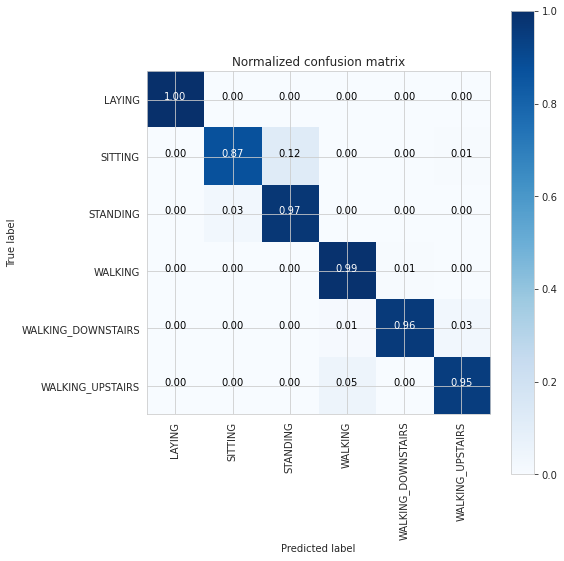

-------------------
| classification_report |
                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       537
           SITTING       0.96      0.87      0.92       491
          STANDING       0.90      0.97      0.93       532
           WALKING       0.95      0.99      0.97       496
WALKING_DOWNSTAIRS       0.99      0.96      0.97       420
  WALKING_UPSTAIRS       0.96      0.95      0.96       471

          accuracy                           0.96      2947
         macro avg       0.96      0.96      0.96      2947
      weighted avg       0.96      0.96      0.96      2947



In [80]:
#Gridsearch
parameters={'C':[0.01, 0.1, 1, 10, 20, 30], 'penalty':['l2','l1']}
log_reg=linear_model.LogisticRegression()
log_reg_grid=GridSearchCV(estimator=log_reg,param_grid=parameters,cv=3,verbose=1,n_jobs=-1)
log_reg_grid_results=perform_model(log_reg_grid,X_train_data,Y_train_data,X_test_data,Y_test_data,class_labels=labels)

In [81]:
# observe the attributes of the model 
print_grid_search_attributes(log_reg_grid_results['model'])

--------------------------
|      Best Estimator     |
--------------------------

	LogisticRegression(C=1)

--------------------------
|     Best parameters     |
--------------------------
	Parameters of best estimator : 

	{'C': 1, 'penalty': 'l2'}

---------------------------------
|   No of CrossValidation sets   |
--------------------------------

	Total numbre of cross validation sets: 3

--------------------------
|        Best Score       |
--------------------------

	Average Cross Validate scores of best estimator : 

	0.9374335617559958



#  2. Linear SVC with GridSearch

training the model
Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:   40.9s finished
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


Done
training time(HH:MM:SS)- 0:00:46.562053

Predicting test data
Done 
 

testing time(HH:MM:SS:ms) - 0:00:00.006640

-------------------
| Accuracy |
0.9670851713607058
-------------------
| Confusion Matrix |
[[537   0   0   0   0   0]
 [  2 428  58   0   0   3]
 [  0   9 522   1   0   0]
 [  0   0   0 496   0   0]
 [  0   0   0   3 412   5]
 [  0   0   0  16   0 455]]


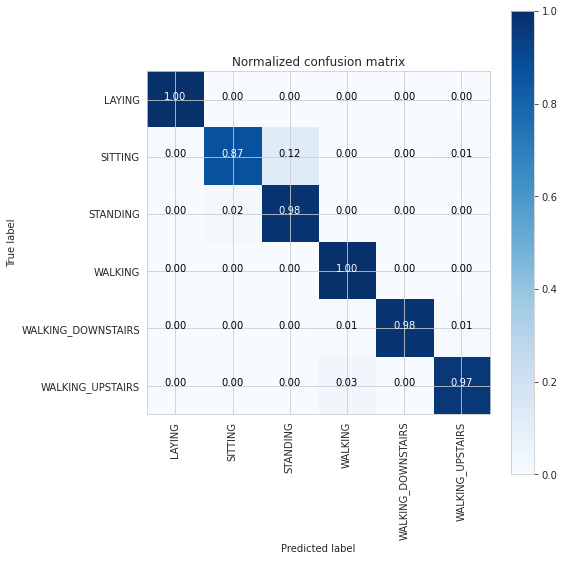

-------------------
| classification_report |
                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       537
           SITTING       0.98      0.87      0.92       491
          STANDING       0.90      0.98      0.94       532
           WALKING       0.96      1.00      0.98       496
WALKING_DOWNSTAIRS       1.00      0.98      0.99       420
  WALKING_UPSTAIRS       0.98      0.97      0.97       471

          accuracy                           0.97      2947
         macro avg       0.97      0.97      0.97      2947
      weighted avg       0.97      0.97      0.97      2947



In [83]:
from sklearn.svm import LinearSVC
parameters = {'C':[0.125, 0.5, 1, 2, 8, 16]}
lr_svc = LinearSVC(tol=0.00005)
lr_svc_grid = GridSearchCV(lr_svc, param_grid=parameters, n_jobs=-1, verbose=1)
lr_svc_grid_results = perform_model(lr_svc_grid,X_train_data,Y_train_data,X_test_data,Y_test_data,class_labels=labels)

In [85]:
print_grid_search_attributes(lr_svc_grid_results['model'])

--------------------------
|      Best Estimator     |
--------------------------

	LinearSVC(C=0.5, tol=5e-05)

--------------------------
|     Best parameters     |
--------------------------
	Parameters of best estimator : 

	{'C': 0.5}

---------------------------------
|   No of CrossValidation sets   |
--------------------------------

	Total numbre of cross validation sets: 5

--------------------------
|        Best Score       |
--------------------------

	Average Cross Validate scores of best estimator : 

	0.9422003634900594



training the model
Done
training time(HH:MM:SS)- 0:06:30.810105

Predicting test data
Done 
 

testing time(HH:MM:SS:ms) - 0:00:06.024181

-------------------
| Accuracy |
0.9626739056667798
-------------------
| Confusion Matrix |
[[537   0   0   0   0   0]
 [  0 441  48   0   0   2]
 [  0  12 520   0   0   0]
 [  0   0   0 489   2   5]
 [  0   0   0   4 397  19]
 [  0   0   0  17   1 453]]


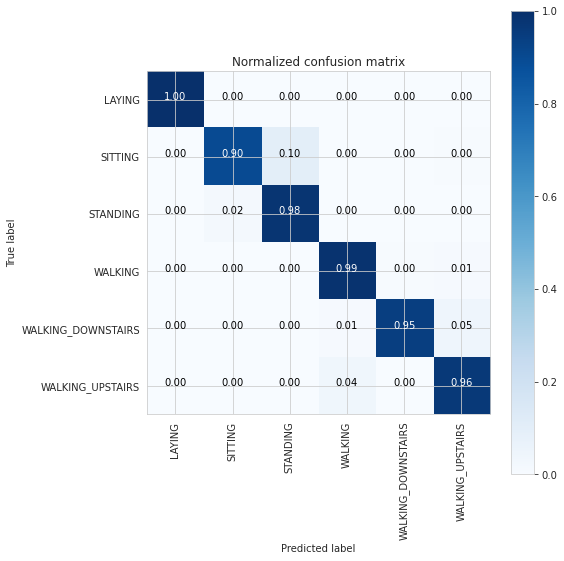

-------------------
| classification_report |
                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       537
           SITTING       0.97      0.90      0.93       491
          STANDING       0.92      0.98      0.95       532
           WALKING       0.96      0.99      0.97       496
WALKING_DOWNSTAIRS       0.99      0.95      0.97       420
  WALKING_UPSTAIRS       0.95      0.96      0.95       471

          accuracy                           0.96      2947
         macro avg       0.96      0.96      0.96      2947
      weighted avg       0.96      0.96      0.96      2947



In [86]:
from sklearn.svm import SVC
parameters = {'C':[2,8,16],\
              'gamma': [ 0.0078125, 0.125, 2]}
rbf_svm = SVC(kernel='rbf')
rbf_svm_grid = GridSearchCV(rbf_svm,param_grid=parameters, n_jobs=-1)
rbf_svm_grid_results = perform_model(rbf_svm_grid,X_train_data,Y_train_data,X_test_data,Y_test_data,class_labels=labels)

# 4. Decision Trees with GridSearchCV


training the model
Done
training time(HH:MM:SS)- 0:00:12.853007

Predicting test data
Done 
 

testing time(HH:MM:SS:ms) - 0:00:00.015621

-------------------
| Accuracy |
0.8632507634882932
-------------------
| Confusion Matrix |
[[537   0   0   0   0   0]
 [  0 385 106   0   0   0]
 [  0  93 439   0   0   0]
 [  0   0   0 470  18   8]
 [  0   0   0  19 339  62]
 [  0   0   0  73  24 374]]


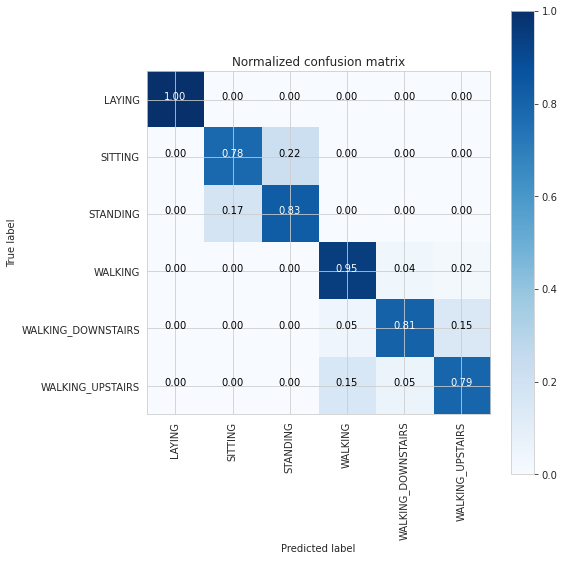

-------------------
| classification_report |
                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       537
           SITTING       0.81      0.78      0.79       491
          STANDING       0.81      0.83      0.82       532
           WALKING       0.84      0.95      0.89       496
WALKING_DOWNSTAIRS       0.89      0.81      0.85       420
  WALKING_UPSTAIRS       0.84      0.79      0.82       471

          accuracy                           0.86      2947
         macro avg       0.86      0.86      0.86      2947
      weighted avg       0.86      0.86      0.86      2947

--------------------------
|      Best Estimator     |
--------------------------

	DecisionTreeClassifier(max_depth=7)

--------------------------
|     Best parameters     |
--------------------------
	Parameters of best estimator : 

	{'max_depth': 7}

---------------------------------
|   No of CrossValidation sets   |
--------------------------

In [95]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
params={"max_depth":np.arange(3,10,2)}
dt_grid=GridSearchCV(dt,param_grid=params,n_jobs=-1)
dt_grid_results=perform_model(dt_grid,X_train_data,Y_train_data,X_test_data,Y_test_data,class_labels=labels)
print_grid_search_attributes(dt_grid_results['model'])


training the model
Done
training time(HH:MM:SS)- 0:08:34.718078

Predicting test data
Done 
 

testing time(HH:MM:SS:ms) - 0:00:00.062495

-------------------
| Accuracy |
0.9253478113335596
-------------------
| Confusion Matrix |
[[537   0   0   0   0   0]
 [  0 434  57   0   0   0]
 [  0  44 488   0   0   0]
 [  0   0   0 483   9   4]
 [  0   0   0  24 357  39]
 [  0   0   0  36   7 428]]


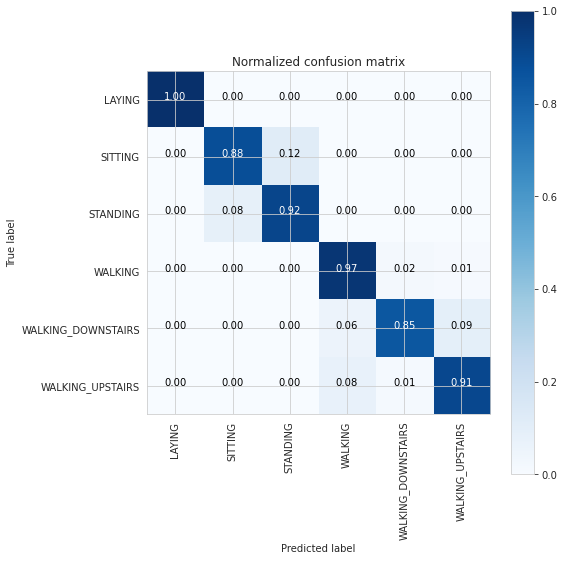

-------------------
| classification_report |
                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       537
           SITTING       0.91      0.88      0.90       491
          STANDING       0.90      0.92      0.91       532
           WALKING       0.89      0.97      0.93       496
WALKING_DOWNSTAIRS       0.96      0.85      0.90       420
  WALKING_UPSTAIRS       0.91      0.91      0.91       471

          accuracy                           0.93      2947
         macro avg       0.93      0.92      0.92      2947
      weighted avg       0.93      0.93      0.93      2947

--------------------------
|      Best Estimator     |
--------------------------

	RandomForestClassifier(max_depth=13, n_estimators=170)

--------------------------
|     Best parameters     |
--------------------------
	Parameters of best estimator : 

	{'max_depth': 13, 'n_estimators': 170}

---------------------------------
|   No of CrossValid

In [97]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()
params={'n_estimators': np.arange(10,201,20), 'max_depth':np.arange(3,15,2)}
rfc_grid=GridSearchCV(rfc,param_grid=params,n_jobs=-1)
rfc_grid_results=perform_model(rfc_grid,X_train_data,Y_train_data,X_test_data,Y_test_data,class_labels=labels)
print_grid_search_attributes(rfc_grid_results['model'])